# **DATA ANALYSIS: RESCALING AND CORRELATION**

**This is a project to analyze the estimated happiness level of a country, in relation to various factors.**

**The factors I wish to analyze are:**
- Income
- Life expectancy
- Freedom to make decisions
- Corruption
- Internet access

**In addition, I would like to analyze the age range of the happiest population in each country.**


**To do so, I will import four different databases that I have collected from the following addresses:**

https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021
https://www.kaggle.com/datasets/levyedgar44/income-and-happiness-correction
https://www.kaggle.com/datasets/sansuthi/gapminder-internet
https://www.kaggle.com/datasets/vladimirmijatovic/world-happiness-report-2024

**Import the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import the 4 datasets and conversion to panda´s DataFrames**.

In [3]:
url = 'https://drive.google.com/file/d/1fIL0kTbFiBSIehvKQAZ6KjAybaSdETRV/view?usp=sharing'  # World happiness report 2021
file_id=url.split('/')[-2]
dwn_url_1='https://drive.google.com/uc?id=' + file_id

url = 'https://drive.google.com/file/d/1Bj2oWX3EJ3BX2HAC38-5WsDCtDo1rD0j/view?usp=sharing'  # Happiness by income
file_id=url.split('/')[-2]
dwn_url_2='https://drive.google.com/uc?id=' + file_id

url = 'https://drive.google.com/file/d/10YF1jH6_8X9q7ObRJEbaNBZCGM5Hq18T/view?usp=sharing'  # Internet access
file_id=url.split('/')[-2]
dwn_url_3='https://drive.google.com/uc?id=' + file_id

url = 'https://drive.google.com/file/d/19QOgodO3tWlKXNpqewbVWOIQg39GDGYC/view?usp=sharing'  # World happiness by age
file_id=url.split('/')[-2]
dwn_url_4='https://drive.google.com/uc?id=' + file_id

data1 = pd.read_csv(dwn_url_1, sep=",")
data2 = pd.read_csv(dwn_url_2, sep=",")
data3 = pd.read_csv(dwn_url_3, sep=",")
data4 = pd.read_csv(dwn_url_4, sep=",")

In [4]:
# Here I simply declare the maximum number of rows and columns to display in the Colab visualizations
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20)

In [5]:
# I print the general information of each DataFrame
data1.info()
data2.info()
data3.info()
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

**I see that the first column of the first DataFrame is called “Country name”, while in the other DataFrames it is called “country”. So I am modifying the name of that column.**
**I am also going to change the names of “Regional indicator” to “region”; and “Ladder score” to “avg_satisfaction”.**

In [6]:
data1.rename(columns={'Country name':'country'}, inplace=True)
data1.rename(columns={'Regional indicator':'region'}, inplace=True)
data1.rename(columns={'Ladder score':'Happiness'}, inplace=True)

In [7]:
# I check the result
data1.head(5)

,country,region,Happiness,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [8]:
# I generate a new dataframe, a subset, with the columns I am going to use: country, region, average happiness, life expectancy, freedom to make decisions and perception of corruption in the country.
data1_sel = data1[["country","region","Happiness", "Healthy life expectancy", "Freedom to make life choices", "Perceptions of corruption"]]
data1_sel.head(5)

,country,region,Happiness,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Finland,Western Europe,7.842,72.0,0.949,0.186
1,Denmark,Western Europe,7.620,72.7,0.946,0.179
2,Switzerland,Western Europe,7.571,74.4,0.919,0.292
3,Iceland,Western Europe,7.554,73.0,0.955,0.673
4,Netherlands,Western Europe,7.464,72.4,0.913,0.338


In [9]:
# I check the columns of dataframe 2
data2.head(5)


,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


In [10]:
# Here I am going to keep only: the country (which I need to join the datasets later) and the average salary per country.
data2_sel = data2[["country","avg_income"]]
data2_sel.head(5)

,country,avg_income
0,Armenia,2096.76
1,Angola,1448.88
2,Argentina,7101.12
3,Austria,19457.04
4,Australia,19917.00


In [11]:
# I check the columns of dataframe 3
data3.head(5)

,country,incomeperperson,internetuserate,urbanrate
0,Afghanistan,NaN,3.654122,24.04
1,Albania,1914.996551,44.989947,46.72
2,Algeria,2231.993335,12.500073,65.22
3,Andorra,21943.339900,81.000000,88.92
4,Angola,1381.004268,9.999954,56.70


In [12]:
# Here I will keep only the country and the use of the Internet
data3_sel = data3[["country","internetuserate"]]
data3_sel.head(5)

,country,internetuserate
0,Afghanistan,3.654122
1,Albania,44.989947
2,Algeria,12.500073
3,Andorra,81.000000
4,Angola,9.999954


In [13]:
# I check the columns of dataframe 4
data4.head(5)

,country,all_ages,the_young,lower_middle,upper_middle,the_old,happiest,least_happy
0,Finland,1,7,1,1,2,Old,Young
1,Denmark,2,5,3,4,1,Old,Young
2,Iceland,3,4,4,2,5,Young,LowerMiddle
3,Sweden,4,18,8,3,4,Old,Young
4,Israel,5,2,2,7,18,Young,Old


In [14]:
# Here I will keep: the country, the age range of the happiest and the least happy population.
data4_sel = data4[["country","happiest","least_happy"]]
data4_sel.head(5)

,country,happiest,least_happy
0,Finland,Old,Young
1,Denmark,Old,Young
2,Iceland,Young,LowerMiddle
3,Sweden,Old,Young
4,Israel,Young,Old


**Join the four DataFrames**

In [15]:
data = pd.merge(data1_sel, data2_sel, on="country", how="inner")

In [16]:
data.head()

,country,region,Happiness,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,avg_income
0,Finland,Western Europe,7.842,72.0,0.949,0.186,17310.195
1,Denmark,Western Europe,7.620,72.7,0.946,0.179,17496.510
2,Switzerland,Western Europe,7.571,74.4,0.919,0.292,23400.040
3,Iceland,Western Europe,7.554,73.0,0.955,0.673,18828.345
4,Netherlands,Western Europe,7.464,72.4,0.913,0.338,18234.435


In [17]:
data_2 = pd.merge(data, data3_sel, on="country", how="inner")

In [18]:
data_2.head()

,country,region,Happiness,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,avg_income,internetuserate
0,Finland,Western Europe,7.842,72.0,0.949,0.186,17310.195,86.898845
1,Denmark,Western Europe,7.620,72.7,0.946,0.179,17496.510,88.770254
2,Switzerland,Western Europe,7.571,74.4,0.919,0.292,23400.040,82.166660
3,Iceland,Western Europe,7.554,73.0,0.955,0.673,18828.345,95.638113
4,Netherlands,Western Europe,7.464,72.4,0.913,0.338,18234.435,90.703555


In [19]:
database = pd.merge(data_2, data4_sel, on="country", how="inner")

In [20]:
database.head()

,country,region,Happiness,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,avg_income,internetuserate,happiest,least_happy
0,Finland,Western Europe,7.842,72.0,0.949,0.186,17310.195,86.898845,Old,Young
1,Denmark,Western Europe,7.620,72.7,0.946,0.179,17496.510,88.770254,Old,Young
2,Switzerland,Western Europe,7.571,74.4,0.919,0.292,23400.040,82.166660,Young,UpperMiddle
3,Iceland,Western Europe,7.554,73.0,0.955,0.673,18828.345,95.638113,Young,LowerMiddle
4,Netherlands,Western Europe,7.464,72.4,0.913,0.338,18234.435,90.703555,Old,Young


In [21]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       101 non-null    object 
 1   region                        101 non-null    object 
 2   Happiness                     101 non-null    float64
 3   Healthy life expectancy       101 non-null    float64
 4   Freedom to make life choices  101 non-null    float64
 5   Perceptions of corruption     101 non-null    float64
 6   avg_income                    101 non-null    float64
 7   internetuserate               100 non-null    float64
 8   happiest                      101 non-null    object 
 9   least_happy                   101 non-null    object 
dtypes: float64(6), object(4)
memory usage: 8.0+ KB


**I check which country has the highest happiness value within each region. And which has the lowest**

In [22]:
# Find the highest value in each region
idx = database.groupby('region')['Happiness'].apply(lambda x: x.idxmax())
max_happ_countries = database.loc[idx, ['region', 'country', 'Happiness']]
max_happ_countries

,region,country,Happiness
21,Central and Eastern Europe,Slovenia,6.461
31,Commonwealth of Independent States,Kazakhstan,6.152
41,East Asia,Japan,5.940
14,Latin America and Caribbean,Costa Rica,7.069
10,Middle East and North Africa,Israel,7.157
9,North America and ANZ,Australia,7.183
62,South Asia,Nepal,5.269
39,Southeast Asia,Thailand,5.985
35,Sub-Saharan Africa,Mauritius,6.049
0,Western Europe,Finland,7.842


In [23]:
# Find the lowest value in each region
idx = database.groupby('region')['Happiness'].apply(lambda x: x.idxmin())
min_happ_countries = database.loc[idx, ['region', 'country', 'Happiness']]
min_happ_countries

,region,country,Happiness
63,Central and Eastern Europe,Bulgaria,5.266
76,Commonwealth of Independent States,Ukraine,4.875
60,East Asia,China,5.339
54,Latin America and Caribbean,Paraguay,5.653
87,Middle East and North Africa,Tunisia,4.596
16,North America and ANZ,United States,6.951
96,South Asia,India,3.819
79,Southeast Asia,Cambodia,4.830
100,Sub-Saharan Africa,Zimbabwe,3.145
51,Western Europe,Greece,5.723


**I'm going to check the happiness data for each region with the income data. And, on the other hand, with internet access.**

In [24]:
# I check the happiness data for each region with the income data.
# We can add several statistics with agg()

database.groupby('region').agg({
    'Happiness': [('mean_satisfaction', 'mean'),
                         ('min_satisfaction', 'min'),
                         ('max_satisfaction', 'max')],
    'avg_income': ['min', 'max']
}).sort_values(by=('Happiness', 'mean_satisfaction'), ascending=False)

Happiness                   \
                                   mean_satisfaction min_satisfaction   
region                                                                  
North America and ANZ                       7.079000            6.951   
Western Europe                              7.003947            5.723   
Latin America and Caribbean                 6.091000            5.653   
Central and Eastern Europe                  6.046100            5.266   
East Asia                                   5.652000            5.339   
Commonwealth of Independent States          5.425000            4.875   
Southeast Asia                              5.409286            4.830   
Middle East and North Africa                5.348000            4.596   
South Asia                                  4.674400            3.819   
Sub-Saharan Africa                          4.506038            3.145   

                                                       avg_income             
                                   max_satisfaction           min        max  
region                                                                        
North America and ANZ                         7.183  19917.000000  23127.000  
Western Europe                                7.842   9982.875000  26182.275  
Latin America and Caribbean                   7.069   2419.200000   7557.990  
Central and Eastern Europe                    6.461   3174.150000  12174.765  
East Asia                                     5.940   2673.642857  14542.800  
Commonwealth of Independent States            6.152   1497.030000   7647.195  
Southeast Asia                                5.985   1491.720000   7286.820  
Middle East and North Africa                  7.157   2864.880000  10645.240  
South Asia                                    5.269   1265.340000   2558.280  
Sub-Saharan Africa                            6.049    574.200000   4120.500

In [25]:
# I do the same thing, but comparing happiness with internet access
database.groupby('region').agg({
    'Happiness': [('mean_satisfaction', 'mean'),
                         ('min_satisfaction', 'min'),
                         ('max_satisfaction', 'max')],
    'internetuserate': ['min', 'max']
}).sort_values(by=('Happiness', 'mean_satisfaction'), ascending=False)

Happiness                   \
                                   mean_satisfaction min_satisfaction   
region                                                                  
North America and ANZ                       7.079000            6.951   
Western Europe                              7.003947            5.723   
Latin America and Caribbean                 6.091000            5.653   
Central and Eastern Europe                  6.046100            5.266   
East Asia                                   5.652000            5.339   
Commonwealth of Independent States          5.425000            4.875   
Southeast Asia                              5.409286            4.830   
Middle East and North Africa                5.348000            4.596   
South Asia                                  4.674400            3.819   
Sub-Saharan Africa                          4.506038            3.145   

                                                    internetuserate             
                                   max_satisfaction             min        max  
region                                                                          
North America and ANZ                         7.183       74.247572  81.338393  
Western Europe                                7.842       44.570074  95.638113  
Latin America and Caribbean                   7.069        9.998554  47.867469  
Central and Eastern Europe                    6.461       40.020095  74.163040  
East Asia                                     5.940       12.900005  77.638535  
Commonwealth of Independent States            6.152       11.549391  46.679702  
Southeast Asia                                5.985        1.259934  56.300034  
Middle East and North Africa                  7.157       13.000111  65.387786  
South Asia                                    5.269        3.700003  16.780037  
Sub-Saharan Africa                            6.049        0.749996  28.731883

**I am looking for null data**

In [26]:
nulls_per_column = database.isnull().sum()
print(nulls_per_column)

country                         0
region                          0
Happiness                       0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       0
avg_income                      0
internetuserate                 1
happiest                        0
least_happy                     0
dtype: int64


In [27]:
# There is a null data. I am looking for the country that does not have this data

data_sorted_by_internet = database.sort_values(by=['internetuserate'], ascending=True)
data_sorted_by_internet[["country", 'region','Happiness', 'internetuserate', 'happiest', 'least_happy']]


,country,region,Happiness,internetuserate,happiest,least_happy
90,Ethiopia,Sub-Saharan Africa,4.275,0.749996,Young,LowerMiddle
68,Niger,Sub-Saharan Africa,5.074,0.829997,Old,UpperMiddle
79,Cambodia,Southeast Asia,4.830,1.259934,Young,LowerMiddle
78,Burkina Faso,Sub-Saharan Africa,4.834,1.400061,LowerMiddle,UpperMiddle
92,Madagascar,Sub-Saharan Africa,4.208,1.699985,Old,LowerMiddle
...,...,...,...,...,...,...
7,Luxembourg,Western Europe,7.324,90.079527,Young,LowerMiddle
4,Netherlands,Western Europe,7.464,90.703555,Old,Young
5,Norway,Western Europe,7.392,93.277508,Old,Young
3,Iceland,Western Europe,7.554,95.638113,Young,LowerMiddle


In [28]:
# I substitute the null value for the median value of his region

database['internetuserate'] = database.groupby('region')['internetuserate'].transform(lambda x: x.fillna(x.median()))


In [29]:
# I check that there are no more null values
nulls_per_column = database.isnull().sum()
print(nulls_per_column)

country                         0
region                          0
Happiness                       0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       0
avg_income                      0
internetuserate                 0
happiest                        0
least_happy                     0
dtype: int64


**Outliers**

In [30]:
# Function that counts the number of outliers

def count_outliers(df: pd.DataFrame, columna:str) -> int:
  Q1 = np.percentile(df[columna], 25)
  Q2 = np.percentile(df[columna], 50)
  Q3 = np.percentile(df[columna], 75)

  IQR = Q3 - Q1

  iqr_lower_limit = Q1 - 1.5 * IQR
  iqr_upper_limit = Q3 + 1.5 * IQR

  outliers_iqr = df[columna][(df[columna] < iqr_lower_limit) | (df[columna] > iqr_upper_limit)]
  return len(outliers_iqr)

In [31]:
# I check the number of outliers

count_outliers(database, "Happiness")

0

# **Data rescaling**

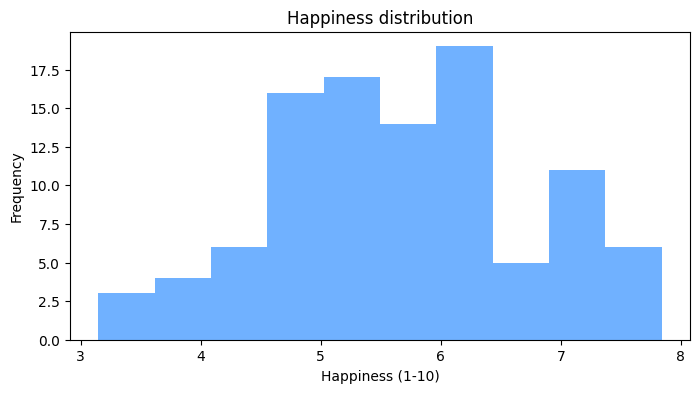

In [32]:
# HISTOGRAM

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(database["Happiness"], alpha=0.7, bins=10, color='#3390FF')
plt.title('Happiness distribution')
plt.xlabel('Happiness (1-10)')
plt.ylabel('Frequency')
plt.show()

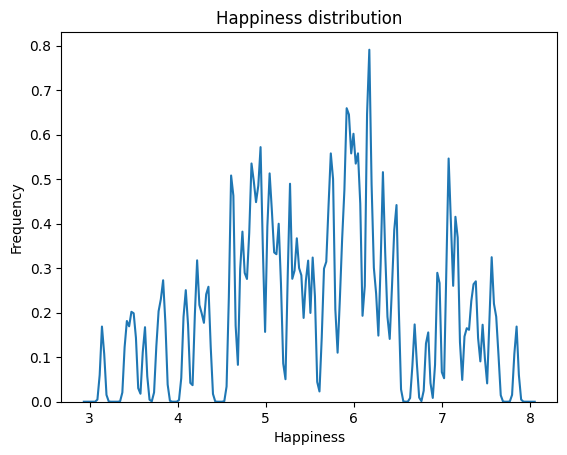

In [33]:
# DENSITY GRAPH
# I make use of the Seaborn library which is easier to use.
import seaborn as sns

sns.kdeplot(data['Happiness'], bw_adjust=0.05, cut=10) # bw_adjust permite suavizar la curva o incrementar su fluctuación. cut controla hasta dónde se extiende la curva más allá de los valores mínimo y máximo del eje x
plt.title('Happiness distribution')
plt.xlabel('Happiness')
plt.ylabel('Frequency')
plt.show()

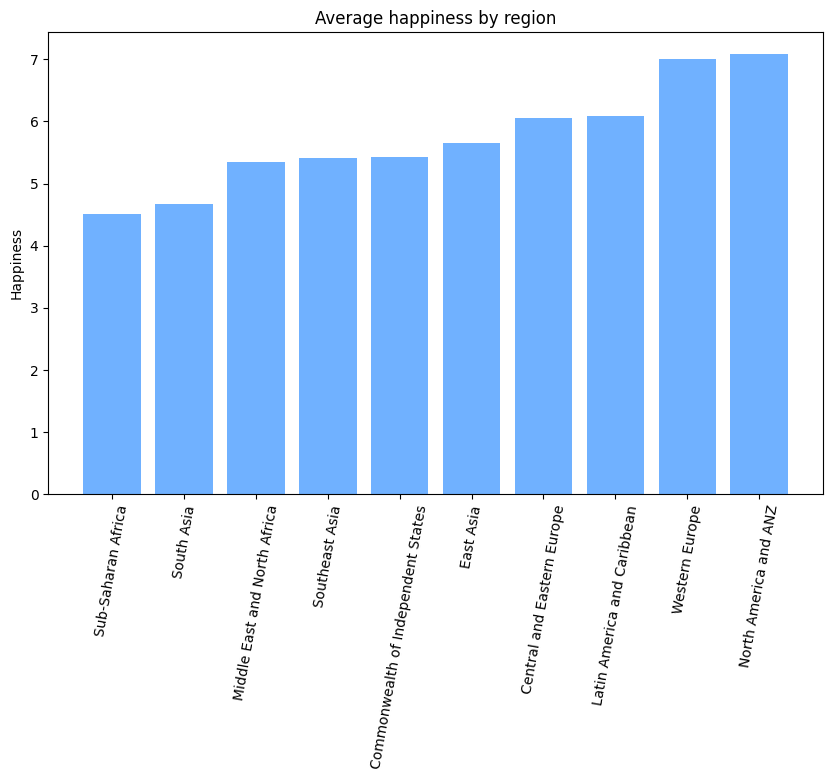

In [34]:
# BAR CHART
# Bar chart to visualize the average happiness of each region

pais_happ = database.groupby('region')['Happiness'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.bar(pais_happ.index, pais_happ.values, alpha=0.7, color='#3390FF')
plt.title('Average happiness by region')
plt.xticks(rotation=80) # Rotamos los nombres de las regiones para evitar que se solapen
plt.xlabel('')
plt.ylabel('Happiness')
plt.show()

**Standardization**

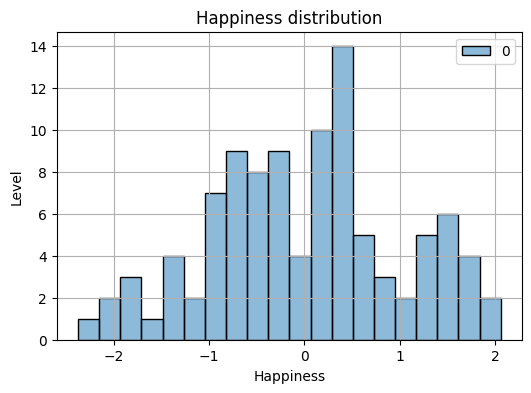

In [35]:
# I will rescale the data, for ease of interpretation.

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

data_scaled = database.copy()
zscore_scaler = StandardScaler()
df_standarized = zscore_scaler.fit_transform(data_scaled[['Happiness']])

plt.figure(figsize=(6, 4))
sns.histplot(df_standarized, bins=20, color='skyblue')
plt.title('Happiness distribution')
plt.xlabel('Happiness')
plt.ylabel('Level')
plt.grid(True)
plt.show()

**Robust Data Scaling**

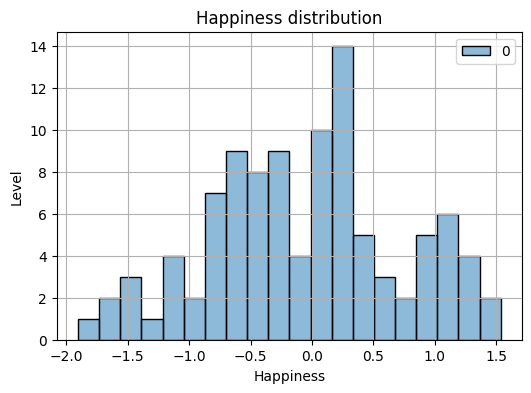

In [36]:
# Robust Data Scaling: this scaler removes the median and scales the data according to the interquartile range
# (IQR: range between the first quartile and the third quartile). It is ideal for data with outliers, as the IQR is robust to them.

data_scaled = database.copy()

robust_scaler = RobustScaler()
df_robust = robust_scaler.fit_transform(data_scaled[['Happiness']])

plt.figure(figsize=(6, 4))
sns.histplot(df_robust, bins=20, color='skyblue')
plt.title('Happiness distribution')
plt.xlabel('Happiness')
plt.ylabel('Level')
plt.grid(True)
plt.show()

#**Data by region**

**I'm going to run a query for each region, to see the differences between each country.**

In [37]:
database.query("region == 'South Asia'").sort_values(by='Happiness', ascending=False)

,country,region,Happiness,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,avg_income,internetuserate,happiest,least_happy
62,Nepal,South Asia,5.269,64.233,0.782,0.727,1428.120,7.930096,Young,UpperMiddle
71,Bangladesh,South Asia,5.025,64.800,0.877,0.682,1265.340,3.700003,Young,UpperMiddle
73,Pakistan,South Asia,4.934,58.709,0.726,0.787,1463.856,16.780037,Young,Old
89,Sri Lanka,South Asia,4.325,67.299,0.841,0.863,2558.280,11.999971,Young,UpperMiddle
96,India,South Asia,3.819,60.633,0.893,0.774,1357.848,7.499996,Young,LowerMiddle


In [38]:
database.query("region == 'Sub-Saharan Africa'").sort_values(by='Happiness', ascending=False)

,country,region,Happiness,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,avg_income,internetuserate,happiest,least_happy
35,Mauritius,Sub-Saharan Africa,6.049,66.701,0.867,0.789,4120.50,28.731883,Old,LowerMiddle
65,Cameroon,Sub-Saharan Africa,5.142,53.515,0.731,0.848,1490.52,3.999977,Young,Old
66,Senegal,Sub-Saharan Africa,5.132,59.802,0.695,0.801,1135.08,15.999650,Young,Old
67,Ghana,Sub-Saharan Africa,5.088,57.586,0.807,0.848,1577.04,9.549931,Young,Old
68,Niger,Sub-Saharan Africa,5.074,53.780,0.806,0.693,718.40,0.829997,Old,UpperMiddle
69,Benin,Sub-Saharan Africa,5.045,54.713,0.757,0.661,989.04,3.129962,Young,UpperMiddle
72,South Africa,Sub-Saharan Africa,4.956,56.904,0.749,0.860,3889.32,12.334893,Young,Old
77,Gabon,Sub-Saharan Africa,4.852,59.962,0.731,0.840,2520.96,7.232224,Young,Old
78,Burkina Faso,Sub-Saharan Africa,4.834,54.151,0.695,0.748,870.84,1.400061,LowerMiddle,UpperMiddle
80,Mozambique,Sub-Saharan Africa,4.794,54.706,0.882,0.684,714.72,4.170136,Young,UpperMiddle


In [39]:
database.query("region == 'Middle East and North Africa'").sort_values(by='Happiness', ascending=False)

,country,region,Happiness,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,avg_income,internetuserate,happiest,least_happy
10,Israel,Middle East and North Africa,7.157,73.503,0.800,0.753,10645.24,65.387786,Young,Old
74,Morocco,Middle East and North Africa,4.918,66.208,0.774,0.801,2864.88,49.000632,Young,Old
83,Iran,Middle East and North Africa,4.721,66.300,0.608,0.714,5215.04,13.000111,Young,UpperMiddle
87,Tunisia,Middle East and North Africa,4.596,67.201,0.656,0.870,3251.28,36.562553,Young,Old


In [40]:
database.query("region == 'Commonwealth of Independent States'").sort_values(by='Happiness', ascending=False)

,country,region,Happiness,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,avg_income,internetuserate,happiest,least_happy
31,Kazakhstan,Commonwealth of Independent States,6.152,65.200,0.853,0.733,3555.093333,33.382128,Young,Old
48,Moldova,Commonwealth of Independent States,5.766,65.699,0.822,0.918,3077.280000,40.122235,Young,Old
50,Kyrgyzstan,Commonwealth of Independent States,5.744,64.401,0.935,0.908,1852.640000,19.582316,Young,LowerMiddle
55,Russia,Commonwealth of Independent States,5.477,64.703,0.718,0.845,7647.195000,43.366498,Young,UpperMiddle
56,Tajikistan,Commonwealth of Independent States,5.466,64.281,0.832,0.553,1497.030000,11.549391,Young,Old
61,Armenia,Commonwealth of Independent States,5.283,67.055,0.825,0.629,2096.760000,44.001025,Young,Old
64,Azerbaijan,Commonwealth of Independent States,5.171,65.656,0.814,0.506,3381.600000,46.679702,Young,Old
75,Georgia,Commonwealth of Independent States,4.891,64.300,0.783,0.655,1957.266667,26.297251,Young,Old
76,Ukraine,Commonwealth of Independent States,4.875,64.902,0.724,0.924,4129.680000,44.585355,Young,Old


In [41]:
database.query("region == 'Southeast Asia'").sort_values(by='Happiness', ascending=False)

,country,region,Happiness,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,avg_income,internetuserate,happiest,least_happy
39,Thailand,Southeast Asia,5.985,67.401,0.884,0.895,4792.500000,21.200072,Young,UpperMiddle
46,Philippines,Southeast Asia,5.880,62.000,0.917,0.742,2224.464000,24.999946,Young,LowerMiddle
57,Vietnam,Southeast Asia,5.411,68.034,0.940,0.796,2231.400000,27.851822,Young,Old
58,Malaysia,Southeast Asia,5.384,67.102,0.895,0.839,7286.820000,56.300034,Young,Old
59,Indonesia,Southeast Asia,5.345,62.236,0.873,0.867,1541.747368,9.900039,Young,Old
70,Laos,Southeast Asia,5.030,58.968,0.910,0.658,1491.720000,6.999880,UpperMiddle,LowerMiddle
79,Cambodia,Southeast Asia,4.830,62.000,0.959,0.843,1868.720000,1.259934,Young,LowerMiddle


In [42]:
database.query("region == 'East Asia'").sort_values(by='Happiness', ascending=False)

,country,region,Happiness,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,avg_income,internetuserate,happiest,least_happy
41,Japan,East Asia,5.940,75.100,0.796,0.638,14542.800000,77.638535,Young,LowerMiddle
53,Mongolia,East Asia,5.677,62.500,0.708,0.856,3181.800000,12.900005,Young,LowerMiddle
60,China,East Asia,5.339,69.593,0.904,0.755,2673.642857,34.377790,Old,LowerMiddle


In [43]:
database.query("region == 'Latin America and Caribbean'").sort_values(by='Happiness', ascending=False)

,country,region,Happiness,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,avg_income,internetuserate,happiest,least_happy
14,Costa Rica,Latin America and Caribbean,7.069,71.400,0.934,0.809,6901.466667,36.499115,Young,UpperMiddle
22,Uruguay,Latin America and Caribbean,6.431,69.100,0.896,0.590,7544.400000,47.867469,Young,UpperMiddle
23,Brazil,Latin America and Caribbean,6.330,66.601,0.804,0.756,5567.235000,40.650098,Young,Old
24,Mexico,Latin America and Caribbean,6.317,68.597,0.862,0.799,4148.000000,31.050013,Young,Old
28,Panama,Latin America and Caribbean,6.180,69.652,0.872,0.856,6250.360000,42.747812,Young,Old
29,Chile,Latin America and Caribbean,6.172,70.000,0.742,0.830,7557.990000,45.000000,Young,Old
34,El Salvador,Latin America and Caribbean,6.061,66.402,0.888,0.688,3410.893333,15.899982,Young,Old
37,Colombia,Latin America and Caribbean,6.012,68.001,0.837,0.841,4618.062857,36.499875,Young,Old
40,Nicaragua,Latin America and Caribbean,5.972,67.657,0.836,0.664,2419.200000,9.998554,Young,UpperMiddle
42,Argentina,Latin America and Caribbean,5.929,69.000,0.828,0.834,7101.120000,36.000335,Young,UpperMiddle


In [44]:
database.query("region == 'Central and Eastern Europe'").sort_values(by='Happiness', ascending=False)

,country,region,Happiness,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,avg_income,internetuserate,happiest,least_happy
21,Slovenia,Central and Eastern Europe,6.461,71.400,0.949,0.806,12174.765000,69.339971,Young,Old
25,Lithuania,Central and Eastern Europe,6.255,67.906,0.773,0.826,6789.160000,62.811900,Young,Old
27,Estonia,Central and Eastern Europe,6.189,68.800,0.909,0.527,7906.725000,74.163040,LowerMiddle,Old
30,Poland,Central and Eastern Europe,6.166,69.702,0.841,0.735,6582.465882,62.471230,UpperMiddle,Old
32,Romania,Central and Eastern Europe,6.140,67.355,0.845,0.938,3174.150000,40.020095,Young,Old
33,Serbia,Central and Eastern Europe,6.078,68.600,0.778,0.835,4629.908571,43.055067,Young,Old
36,Latvia,Central and Eastern Europe,6.032,67.100,0.715,0.800,6722.901818,71.514724,Young,Old
38,Hungary,Central and Eastern Europe,5.992,68.000,0.755,0.876,6903.883636,65.163251,Young,Old
45,Croatia,Central and Eastern Europe,5.882,70.799,0.754,0.939,7828.080000,60.119707,Young,Old
63,Bulgaria,Central and Eastern Europe,5.266,67.000,0.788,0.932,5354.820000,45.986590,Young,Old


In [45]:
database.query("region == 'Western Europe'").sort_values(by='Happiness', ascending=False)

,country,region,Happiness,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,avg_income,internetuserate,happiest,least_happy
0,Finland,Western Europe,7.842,72.000,0.949,0.186,17310.195000,86.898845,Old,Young
1,Denmark,Western Europe,7.620,72.700,0.946,0.179,17496.510000,88.770254,Old,Young
2,Switzerland,Western Europe,7.571,74.400,0.919,0.292,23400.040000,82.166660,Young,UpperMiddle
3,Iceland,Western Europe,7.554,73.000,0.955,0.673,18828.345000,95.638113,Young,LowerMiddle
4,Netherlands,Western Europe,7.464,72.400,0.913,0.338,18234.435000,90.703555,Old,Young
5,Norway,Western Europe,7.392,73.300,0.960,0.270,21877.710000,93.277508,Old,Young
6,Sweden,Western Europe,7.363,72.700,0.945,0.237,17032.755000,90.016190,Old,Young
7,Luxembourg,Western Europe,7.324,72.600,0.907,0.386,26182.275000,90.079527,Young,LowerMiddle
8,Austria,Western Europe,7.268,73.300,0.908,0.481,19457.040000,72.731576,Young,UpperMiddle
11,Germany,Western Europe,7.155,72.500,0.875,0.460,19285.960000,82.526898,LowerMiddle,Young


In [46]:
database.query("region == 'North America and ANZ'").sort_values(by='Happiness', ascending=False)

,country,region,Happiness,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,avg_income,internetuserate,happiest,least_happy
9,Australia,North America and ANZ,7.183,73.9,0.914,0.442,19917.00,75.895654,Old,LowerMiddle
12,Canada,North America and ANZ,7.103,73.8,0.915,0.415,20190.78,81.338393,Old,Young
16,United States,North America and ANZ,6.951,68.2,0.837,0.698,23127.00,74.247572,Old,LowerMiddle


# **Correlations**

In [47]:
data_corr = database.copy()

# Norm test
from scipy.stats import shapiro, kstest, norm

w_statistic, p_value = shapiro(data_corr["Happiness"])
print(f"Statistic W: {round(w_statistic,3)}, P: {round(p_value,3)}")

Statistic W: 0.984, P: 0.286


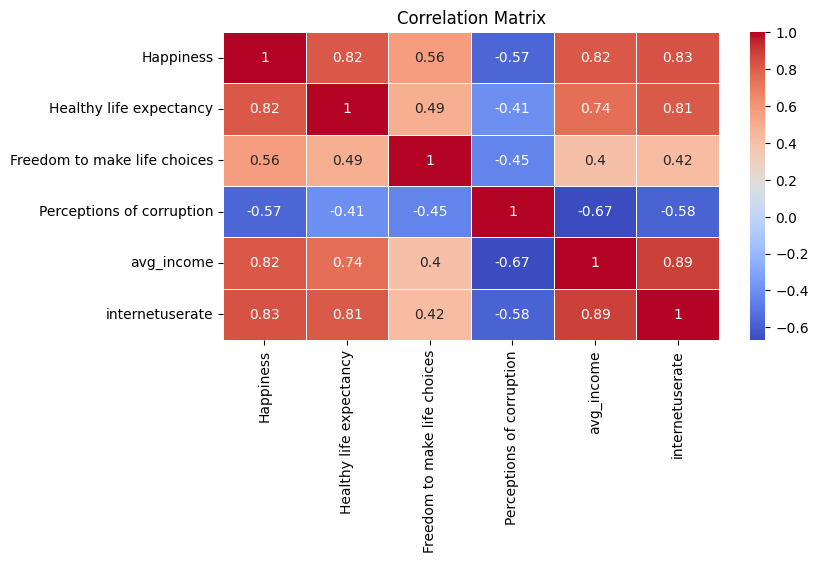

In [48]:
correlation_matrix = data_corr[["Happiness", "Healthy life expectancy", "Freedom to make life choices", "Perceptions of corruption", "avg_income", "internetuserate"]].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**I am going to make a correlation between a country's income level and its life expectancy.**

Pearson correlation: 0.7412902876431364


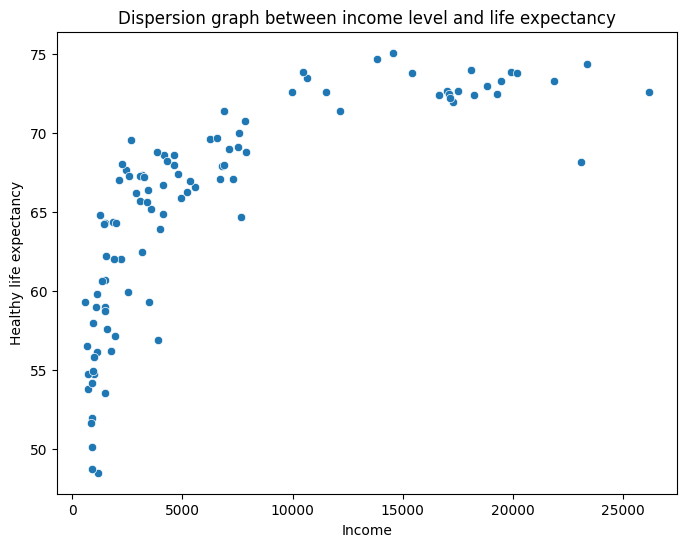

In [55]:
pearson_corr = data_corr["avg_income"].corr(data_corr['Healthy life expectancy'])
print("Pearson correlation:", pearson_corr)

zscore_scaler = StandardScaler()
#data_corr['Average_IQ'] = zscore_scaler.fit_transform(data_corr[['Average_IQ']])
#data_corr['GNI_2021'] = zscore_scaler.fit_transform(data_corr[['GNI_2021']])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_income', y='Healthy life expectancy', data=data_corr[['avg_income','Healthy life expectancy']],)
plt.title('Dispersion graph between income level and life expectancy')
plt.xlabel('Income')
plt.ylabel('Healthy life expectancy')
plt.show()

**I´m going to make another correlation. This time between income level and internet access.**

Pearson correlation: 0.8889361144329648


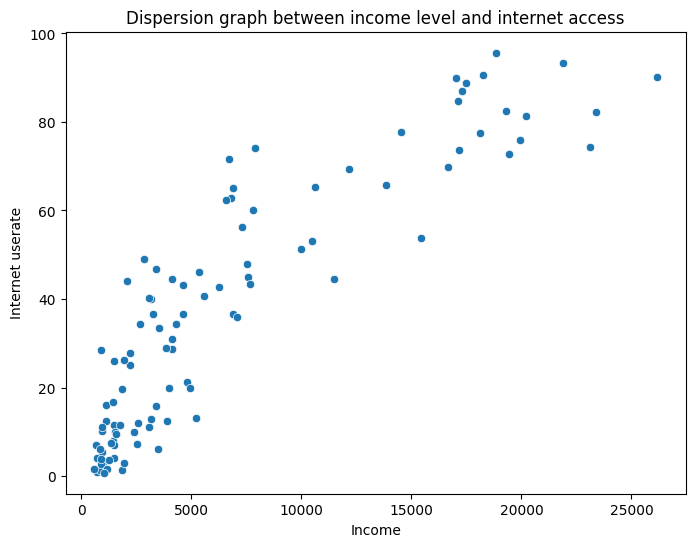

In [54]:
pearson_corr = data_corr["avg_income"].corr(data_corr['internetuserate'])
print("Pearson correlation:", pearson_corr)

zscore_scaler = StandardScaler()
#data_corr['Average_IQ'] = zscore_scaler.fit_transform(data_corr[['Average_IQ']])
#data_corr['GNI_2021'] = zscore_scaler.fit_transform(data_corr[['GNI_2021']])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_income', y='internetuserate', data=data_corr[['avg_income','internetuserate']],)
plt.title('Dispersion graph between income level and internet access')
plt.xlabel('Income')
plt.ylabel('Internet userate')
plt.show()

# **Conclusions**

**-** The first conclusion is that, in general, it is true that **money brings happiness**. We see that countries with high incomes have the highest happiness indexes. As can be seen in northern European countries.
**Although we find cases of countries with low incomes that have high happiness indexes**, as is the case of Costa Rica and other countries in Central and South America.

**-** **Happiness is also highly proportional to life expectancy**. Countries with longer life expectancy have high values of happiness. Although life expectancy we see that it is also highly related to income level.

**-** An interesting conclusion is that **in countries with higher incomes, the happiest population is the oldest**. While **in countries with lower incomes, it is the young people who are happiest**.

**-** **Corruption is inversely proportional to all other factors**. Especially in terms of happiness, income and internet access.

**-** Regarding internet access, I have my doubts. On the one hand, in the correlation matrix, we see that it is proportional to happiness. But, as with income, there are countries where internet access is low and happiness is high.

So, I believe that **internet access has more to do with income level than with happiness**. As seen in the scatter plot between these two variables.